# **Convolutional Neural Networks**

Deep Learning for Image Classification
Deep learning, a subset of Artificial Intelligence (AI), uses large datasets to recognize patterns within input images and produce meaningful classes with which to label the images. 

A common deep learning method for image classification is to train an Artificial Neural Network (ANN) to process input images and generate an output with a class for the image.

The challenge with deep learning for image classification is that it can take a long time to train artificial neural networks for this task. However, Convolutional Neural Networks (models) excel at this type of task.



The Use of Convolutional Neural Networks for Image Classification
The model approach is based on the idea that the model function properly based on a local understanding of the image. 

It uses fewer parameters compared to a fully connected network by reusing the same parameter numerous times. While a fully connected network generates weights from each pixel on the image, a convolutional neural network generates just enough weights to scan a small area of the image at any given time.

This approach is beneficial for the training process ━ the fewer parameters within the network, the better it performs. Additionally, since the model requires less amount of data, it is also able to train faster.

When a model model is trained to classify an image, it searches for the features at their base level. For example, while a human might identify an elephant by its large ears or trunk, a computer will scan for curvatures of the boundaries of these features.

Some object detection networks like YOLO achieve this by generating bounding boxes, which predict the presence and class of objects within the bounding boxes. Instance segmentation , a subset of image segmentation , takes this a step further and draws boundaries for each object, identifying its shape.

image.png

There are many applications for image classification with deep neural networks. 

models can be embedded in the systems of autonomous cars to help the system recognize the surrounding of the car and classify objects to distinguish between ones that do not require any action, such as trees on the side of the road, and ones that do, such as civilians crossing the street.

Another use for models is in advertising. For example, models can easily scan a person’s Facebook page, classify fashion-related images and detect the person’s preferred style, allowing marketers to offer more relevant clothing advertisements. With a deep enough network, this principle can also be applied to identifying locations, such as pubs or malls, and hobbies like football or dancing.

**Convolutional Neural Networks** are very similar to ordinary Neural Networks it makes them up of neurons that have learnable weights and biases. <br>Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity.<br> The entire network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. <br> And they still have a loss function (e.g. **SVM**/**Softmax**) on the last (**fully connected**) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.
<br>
Instead of preprocessing the data to derive features like textures and shapes, a **model** takes just the image's raw pixel data as input and "learns" how to extract these features, and ultimately infer what object they constitute.<br>
To start, the **model** receives an input feature map: a three-dimensional matrix 

---

where the size of the first two dimensions corresponds to the length and width of the images in pixels. <br>The size of the third dimension is 3 (corresponding to the 3 channels of a color image: $\color{red}{\text{red}}$, $\color{green}{\text{green}}$, and $\color{blue}{\text{blue}}$). The **model** comprises a stack of modules, each of which performs three operations.



---

# 1- Convolution
A convolution extracts tiles of the input feature map, and applies filters to them to compute new features, producing an output feature map, or convolved feature (which may have a different size and depth than the input feature map). Convolutions are defined by two parameters:



*   Size of the tiles that are extracted (typically 3x3 or 5x5 pixels).

*   The depth of the output feature map, which corresponds to the number of filters that are applied.

*   During a convolution, the filters (matrices the same size as the tile size) effectively slide over the input feature map's grid horizontally and vertically, one pixel at a time, extracting each corresponding tile.






 A 3x3 convolution of depth 1 performed over a 5x5 input feature map, also of depth 1. There are nine possible 3x3 locations to extract tiles from the 5x5 feature map, so this convolution produces a 3x3 output feature map.

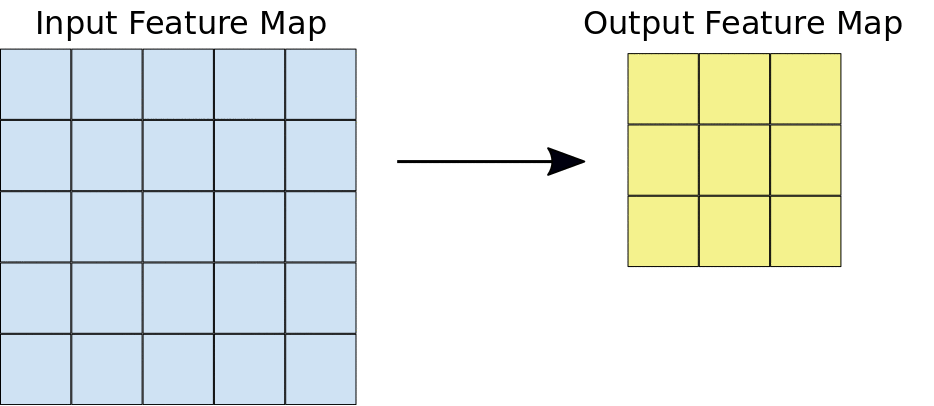

For each filter-tile pair, the model performs element-wise multiplication of the filter matrix and the tile matrix, and then sums all the elements of the resulting matrix to get a single value.

Each of these resulting values for every filter-tile pair is then output in the convolved feature matrix

---



3D volumes of neurons. Convolutional Neural Networks take advantage of the fact that the input consists of images and they constrain the architecture in a more sensible way.
 
In particular, unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth. (Note that the word depth here refers to the third dimension of an activation volume, not to the depth of a full Neural Network, which can refer to the total number of layers in a network.

image.png

**For example, an image of more respectable size, e.g. 200x200x3, would lead to neurons that have 200*200*3 = 120,000 weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful and the huge number of parameters would quickly lead to overfitting.**

Screenshot from 2021-03-05 19-13-25.png

During training, the model "learns" the optimal values for the filter matrices that enable it to extract meaningful features (textures, edges, shapes) from the input feature map. As the number of filters (output feature map depth) applied to the input increases, so does the number of features the model can extract. However, the tradeoff is that filters compose the majority of resources expended by the model, so training time also increases as more filters are added. Additionally, each filter added to the network provides less incremental value than the previous one, so engineers aim to construct networks that use the minimum number of filters needed to extract the features necessary for accurate image classification.

# 2- Pooling Layer

It is common to periodically insert a Pooling layer in-between successive Conv layers in a ConvNet architecture. </br>Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. </br>The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX operation.</br> The most common form is a pooling layer with filters of size 2x2 applied with a stride of 2 downsamples every depth slice in the input by 2 along both width and height, discarding 75% of the activations. </br>Every MAX operation would in this case be taking a max over 4 numbers (little 2x2 region in some depth slice). </br>The depth dimension remains unchanged. More generally, the pooling layer:

General pooling. In addition to max pooling, the pooling units can also perform other functions, such as average pooling or even L2-norm pooling. </br>Average pooling was often used historically but has recently fallen out of favor compared to the max pooling operation, which has been shown to work better in practice.



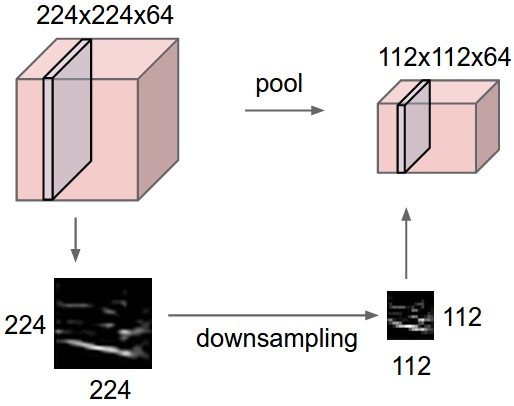

We slide over the feature map and extract tiles of a specified size. For each tile, the maximum value is output to a new feature map, and all other values are
 discarded. Max pooling operations take two parameters:




1.   Size of the max-pooling filter (typically 2x2 pixels)

2.   Stride: the distance, in pixels, separating each extracted tile. Unlike with convolution, where filters slide over the feature map pixel by pixel, in max pooling, the stride determines the locations where each tile is extracted. For a 2x2 filter, a stride of 2 specifies that the max pooling operation will extract all nonoverlapping 2x2 tiles from the feature map.



maxpool.jpeg

Left: Max pooling performed over a 4x4 feature map with a 2x2 filter and stride of 2. Right: the output of the max pooling operation. Note the resulting feature map is now 2x2, preserving only the maximum values from each tile.

---



# 3- Activation layers

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.

An additional aspect of activation functions is that they must be computationally efficient because they are calculated across thousands or even millions of neurons for each data sample. Modern neural networks use a technique called backpropagation to train the model, which places an increased computational strain on the activation function, and its derivative function.

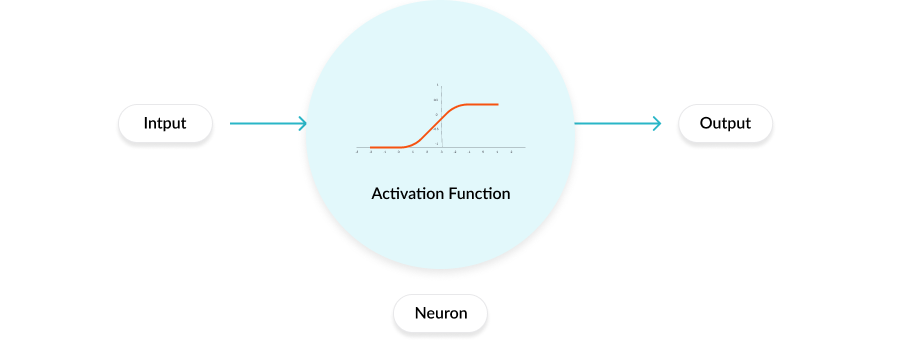

In a neural network, numeric data points, called inputs, are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.


The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. </br> Or it can be a transformation that maps the input signals into output signals that are needed for the neural network to function.

**Types of Activation Functions**


1.   Linear Activation Function

2.   Non-Linear Activation Functions




image.png

A linear activation function takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input. In one sense, a linear function is better than a step function because it allows multiple outputs, not just yes and no.

However, a linear activation function has two major problems:

1. Not possible to use backpropagation  (gradient descent) to train the model—the derivative of the function is a constant, and has no relation to the input, X. So it’s not possible to go back and understand which weights in the input neurons can provide a better prediction.


2. All layers of the neural network collapse into one—with linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.

A neural network with a linear activation function is simply a linear regression model. It has limited power and ability to handle complexity varying parameters of input data.





Generally a neural network models use non-linear activation functions.</br> They allow the model to create complex mappings between the network’s inputs and outputs, which are essential for learning and modeling complex data, such as images, video, audio, and data sets which are non-linear or have high dimensionality.

Almost any process imaginable can be represented as a functional computation in a neural network, provided that the activation function is non-linear.

Non-linear functions address the problems of a linear activation function:


*   They allow backpropagation because they have a derivative function which is related to the inputs.

*   They allow “stacking” of multiple layers of neurons to create a deep neural network. Multiple hidden layers of neurons are needed to learn complex data sets with high levels of accuracy.




**Common Nonlinear Activation Functions  and How to Choose an Activation Function**

**Sigmoid / Logistic**
**Advantages**
Smooth gradient, preventing “jumps” in output values.
Output values bound between 0 and 1, normalizing the output of each neuron.
Clear predictions.</br>— For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This enables clear predictions.
</br>
**Disadvantages**
Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem.</br>
 This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.</br>

Outputs not zero centered.</br>

Computationally expensive.

**ReLU (Rectified Linear Unit)**</br>
**Advantages**</br>
Computationally efficient</br>— allows the network to converge very quickly
Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation.</br>
**Disadvantages**</br>
The Dying ReLU problem</br>— when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.


**Softmax**</br>
**Advantages**</br>
Able to handle multiple classes only one class in other activation functions—normalizes the outputs for each class between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific class.</br>
Useful for output neurons—typically Softmax is used only for the output layer, for neural networks that need to classify inputs into multiple categories.


# 4- Normalization Layer

Many types of normalization layers have been proposed for use in model architectures, sometimes with the intentions of implementing inhibition schemes observed in the biological brain. 

# 5-Fully Connected Layers

At the end of a convolutional neural network are one or more fully connected layers (when two layers are "fully connected," every node in the first layer is connected to every node in the second layer). </br>Their job is to perform classification based on the features extracted by the convolutions. </br>Typically, the final fully connected layer contains a softmax activation function, which outputs a probability value from 0 to 1 for each of the classification labels the model is trying to predict.

---



#**Data Description**</br>
**Context**</br>
Pneumonia is an infection that inflames the air sacs in one or both lungs. It kills more children younger than 5 years old each year than any other infectious disease, such as HIV infection, malaria, or tuberculosis. Diagnosis is often based on symptoms and physical examination. Chest X-rays may help confirm the diagnosis.








image.png

**What is Pneumonia ?** </br>
Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia by Statistics

image.png

**Content**</br>
This dataset contains 5,856 validated Chest X-Ray images. The images are split into a training set and a testing set of independent patients. Images are labeled as (disease:NORMAL/BACTERIA/VIRUS)-(randomized patient ID)-(image number of a patient). For details of the data collection and description, see the referenced paper below.

According to the paper, the images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.

image.png

**Load the data**



In [ ]:
# !pip install -U --no-cache-dir gdown --pre
# import gdown
# url = 'https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_'
# output='Dataset.zip'
# gdown.download(url, output, quiet=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip dataset
!unzip /content/drive/MyDrive/chest_xray.zip

**Installing and importing necessary libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras import Sequential


from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D, MaxPooling2D
)
%matplotlib inline

**Data Preparation**

In [ ]:
train_dir = os.path.join('/content/chest_xray/train')
test_dir = os.path.join('/content/chest_xray/test')

# Directory with training X-ray images
train_normal_dir = os.path.join('/content/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('/content/chest_xray/train/PNEUMONIA')

# Directory with validation X-ray images
test_normal_dir = os.path.join('/content/chest_xray/test/NORMAL')
test_pneumonia_dir = os.path.join('/content/chest_xray/test/PNEUMONIA')

This line of code will look into the filenames in the directories




In [ ]:
train_normal_fnames = os.listdir(train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )

print(train_normal_fnames[:5])
print(train_pneumonia_fnames[:5])

['NORMAL-9367911-0001.jpeg', 'NORMAL-5409923-0001.jpeg', 'NORMAL-6478227-0001.jpeg', 'NORMAL-2552119-0003.jpeg', 'NORMAL-9742274-0001.jpeg']
['BACTERIA-3828519-0001.jpeg', 'VIRUS-4970211-0002.jpeg', 'VIRUS-6750824-0002.jpeg', 'VIRUS-3911488-0003.jpeg', 'BACTERIA-7620642-0004.jpeg']


image.png

In [ ]:
#Number of pneumonia and normal x-ray images
print('total training normal x-ray images :', len(os.listdir(train_normal_dir)))
print('total training pneumonia  x-rayimages :', len(os.listdir(train_pneumonia_dir)))

print('total test normal x -ray images :', len(os.listdir( test_normal_dir ) ))
print('total test pneumonia x-ray images :', len(os.listdir( test_pneumonia_dir) ))


total training normal x-ray images : 1349
total training pneumonia  x-rayimages : 3883
total test normal x -ray images : 234
total test pneumonia x-ray images : 390


**Preprocessing**

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            color_mode = 'grayscale',
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(320, 320))



test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                           color_mode = 'grayscale',
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(320, 320))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Creating the model**

In [ ]:
img_width, img_height = 320, 320
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'sigmoid', units = 1))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

**Train the model**

Let us train the model using `fit()` method.

In [ ]:
num_pneumonia = len(train_pneumonia_dir)
num_normal = len(train_normal_dir)

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

r = model.fit(
    train, 
    epochs=10,
    validation_data=test,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/10
654/654 [==============================] - 117s 175ms/step - loss: 0.1367 - accuracy: 0.8903 - val_loss: 0.3444 - val_accuracy: 0.8862
Epoch 2/10
654/654 [==============================] - 115s 176ms/step - loss: 0.0851 - accuracy: 0.9365 - val_loss: 0.3144 - val_accuracy: 0.8878
Epoch 3/10
654/654 [==============================] - 116s 177ms/step - loss: 0.0695 - accuracy: 0.9480 - val_loss: 0.3047 - val_accuracy: 0.9054
Epoch 4/10
654/654 [==============================] - 116s 177ms/step - loss: 0.0632 - accuracy: 0.9537 - val_loss: 0.4725 - val_accuracy: 0.8349
Epoch 5/10
654/654 [==============================] - 114s 174ms/step - loss: 0.0589 - accuracy: 0.9585 - val_loss: 0.2514 - val_accuracy: 0.9054
Epoch 6/10
654/654 [==============================] - 114s 175ms/step - loss: 0.0508 - accuracy: 0.9646 - val_loss: 0.2433 - val_accuracy: 0.9231
Epoch 7/10
654/654 [==============================] - 115s 176ms/step - loss: 0.0482 - accuracy: 0.9658 - val_loss: 0.4045 -

***Plotting training and validation curves for accuracy and loss***

Text(0.5, 1.0, 'Accuracy Evolution')

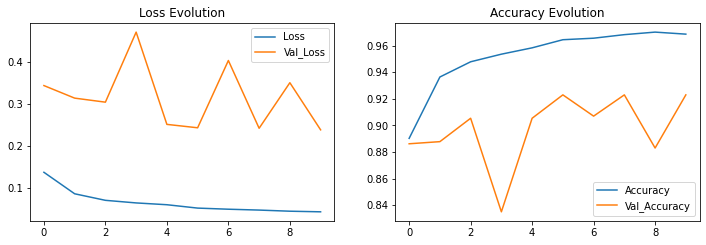

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 22ms/step - loss: 0.2991 - accuracy: 0.9103
Test Accuracy: 91.03%
654/654 [==============================] - 95s 146ms/step - loss: 0.0804 - accuracy: 0.9667
Train Accuracy: 96.67%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[191  43]
 [  5 385]]


,0,1,accuracy,macro avg,weighted avg
precision,0.974490,0.899533,0.923077,0.937011,0.927642
recall,0.816239,0.987179,0.923077,0.901709,0.923077
f1-score,0.888372,0.941320,0.923077,0.914846,0.921465
support,234.000000,390.000000,0.923077,624.000000,624.000000
